<a href="https://colab.research.google.com/github/rzunick/MNA-Navegacion-Autonoma-Equipo-14/blob/main/Proyecto_Final_Equipo_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

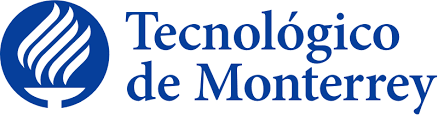

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Navegación autónoma**
## Profesor: David Antonio Torres
## Proyecto Final - Behavioral Cloning
## **Equipo 14**:
### - *Alejandro Juárez Corona-A01168444*
### - *Juan Carlos Lopez Cruz- A01793052*
### - *Ronald David Zúniga Sánchez-A01686240*
### - *Rodrigo López Aguilera-A01793071*

## **Marco Teórico**

**Clonación conductual aplicada a un coche autónomo en una pista simulada**

Con la fase creciente de inteligencia artificial y aprendizaje autónomo, El coche autónomo es una de las áreas prometedoras de investigación y emerge como un Centro de enfoque para las industrias del automóvil.

La clonación conductual es un proceso de reproducción de tareas realizadas por humanos por una red neuronal profunda. la clonación conductual se logra entrenando la red neuronal con los datos del sujeto humano que realiza la tarea. En 1989, El automóvil autónomo fue desarrollado por Pomerleau basado en redes neuronales. Posteriormente, desde hace 130 años, los fabricantes de automóviles no prestaron atención a la sustitución del conductor, que es la parte más vulnerable del automóvil.

Las empresas automotrices trataron de hacer los autos más seguros al incluir muchas medidas de seguridad.
características como sistemas antibloqueo de frenos, vidrios irrompibles, bolsas de aire, etc.
Sin embargo, las organizaciones no lograron desarrollar inteligencia sin conductor.

Los autos sin conductor son el cambio revolucionario más deseable en el siglo XXI para una experiencia de conducción totalmente segura para cambiar la forma de transporte. De acuerdo a el informe de la Organización Mundial de la Salud sobre el “Informe sobre la situación mundial de la seguridad vial
2018”, cada año alrededor de 1,35 millones de seres humanos pierden la vida a causa de accidentes de tráfico. Los automóviles autónomos reducirán este número y también permitirán que las personas
con discapacidad para viajar fácilmente.

Las redes neuronales de convolución (CNN) tienen revolucionó el reconocimiento de patrones con la capacidad de capturar imágenes 2D en el contexto de los coches autónomos. La mayor ventaja de CNN es que extrae automáticamente las características importantes para interpretar el entorno circundante a partir de las imágenes que se pueden utilizar para desarrollar la conducción inteligente
sistema.

El modelo de aprendizaje profundo de extremo a extremo es la opción más popular para manejar grandes volúmenes de datos entre los investigadores. Convencionalmente, los enfoques de aprendizaje profundo descomponen el problema en varios subproblemas para resolverlos de forma independiente, y todos los resultados se combinan para tomar la decisión final. Muchas compañías automotrices como Hyundai, Tesla, etc., están tratando de traer millones de autos autónomos o autónomos a la carretera utilizando enfoques de aprendizaje profundo. En esta carrera frenética para crear autos autónomos totalmente seguros, algunas de las organizaciones como NVIDIA están siguiendo el enfoque de extremo a extremo.

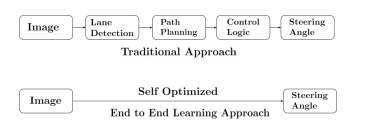

## **Código**

### **Importar Librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense

import cv2
import pandas as pd
import random
import os
import ntpath

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import matplotlib.image as mpimg
from imgaug import augmenters as iaa

In [ ]:
if tf.test.gpu_device_name():
    print('GPU device found:', tf.test.gpu_device_name())
else:
    print("No GPU found. Please check the runtime configuration.")

GPU device found: /device:GPU:0


In [ ]:
# Specify the GPU device to use (if multiple GPUs are available)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Verify TensorFlow is using GPU
print('TensorFlow is using GPU:', tf.test.is_built_with_cuda())

TensorFlow is using GPU: True


### Conexión con Github.

In [ ]:
!git clone https://github.com/rzunick/MNA-Navegacion-Autonoma-Equipo-14.git

Cloning into 'MNA-Navegacion-Autonoma-Equipo-14'...
remote: Enumerating objects: 34920, done.
remote: Counting objects: 100% (1107/1107), done.
remote: Compressing objects: 100% (1062/1062), done.
remote: Total 34920 (delta 58), reused 1071 (delta 44), pack-reused 33813
Receiving objects: 100% (34920/34920), 563.82 MiB | 36.65 MiB/s, done.
Resolving deltas: 100% (60/60), done.
Updating files: 100% (34800/34800), done.


### Preparación de Base de Datos

In [ ]:
#Inicializamos carpeta de trabajo e importamos archivo csv

datadir = "/content/MNA-Navegacion-Autonoma-Equipo-14/data/udacity_sim/track_1"

columns = ['center', 'left', 'right', 'steering', 'throttle',
'reverse', 'speed']

data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)

pd.set_option('display.max_colwidth', -1)

data.head()

<ipython-input-5-6e329d289c24>:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


center  \
0  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\center_2023_06_19_22_04_58_723.jpg   
1  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\center_2023_06_19_22_04_58_792.jpg   
2  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\center_2023_06_19_22_04_58_864.jpg   
3  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\center_2023_06_19_22_04_58_937.jpg   
4  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\center_2023_06_19_22_04_59_008.jpg   

                                                                                   left  \
0  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\left_2023_06_19_22_04_58_723.jpg   
1  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\left_2023_06_19_22_04_58_792.jpg   
2  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\left_2023_06_19_22_04_58_864.jpg   
3  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\left_2023_06_19_22_04_58_937.jpg   
4  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\left_2023_06_19_22_04_59_008.jpg   

                                                                                   right  \
0  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\right_2023_06_19_22_04_58_723.jpg   
1  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\right_2023_06_19_22_04_58_792.jpg   
2  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\right_2023_06_19_22_04_58_864.jpg   
3  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\right_2023_06_19_22_04_58_937.jpg   
4  C:\Users\rzuniga\Documents\udacity_data\track_1\IMG\right_2023_06_19_22_04_59_008.jpg   

   steering  throttle  reverse      speed  
0  0.0       1.0       0        6.762121   
1  0.0       1.0       0        7.674099   
2  0.0       1.0       0        8.353499   
3 -0.1       1.0       0        9.251003   
4 -0.3       1.0       0        10.119220

In [ ]:
# Depuración de datos para dejar solo el nombre del archivo unicamente

def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2023_06_19_22_04_58_723.jpg  left_2023_06_19_22_04_58_723.jpg   
1  center_2023_06_19_22_04_58_792.jpg  left_2023_06_19_22_04_58_792.jpg   
2  center_2023_06_19_22_04_58_864.jpg  left_2023_06_19_22_04_58_864.jpg   
3  center_2023_06_19_22_04_58_937.jpg  left_2023_06_19_22_04_58_937.jpg   
4  center_2023_06_19_22_04_59_008.jpg  left_2023_06_19_22_04_59_008.jpg   

                               right  steering  throttle  reverse      speed  
0  right_2023_06_19_22_04_58_723.jpg  0.0       1.0       0        6.762121   
1  right_2023_06_19_22_04_58_792.jpg  0.0       1.0       0        7.674099   
2  right_2023_06_19_22_04_58_864.jpg  0.0       1.0       0        8.353499   
3  right_2023_06_19_22_04_58_937.jpg -0.1       1.0       0        9.251003   
4  right_2023_06_19_22_04_59_008.jpg -0.3       1.0       0        10.119220

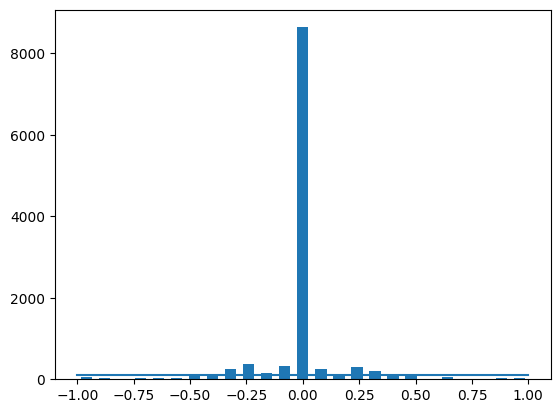

In [ ]:
# Visualización de la base de datos para observar distribución

num_bins = 25
samples_per_bin = 100

hist, bins = np.histogram(data['steering'], num_bins)

center = (bins[:-1]+ bins[1:]) * 0.5

plt.bar(center, hist, width=0.05)

plt.plot((np.min(data['steering']), np.max(data['steering'])),(samples_per_bin, samples_per_bin))

Se observa que la base de datos tiene muchos más registros en "ángulo 0" los cuales corresponden a imágenes tomadas mientras el vehículo se trasladaba en línea recta.

Para obtener un dataset más equilibrado entre clases (ángulos para el manejo automático), es necesario truncar el número de datos máximo.

total data: 11269
removed: 9715
remaining: 1554


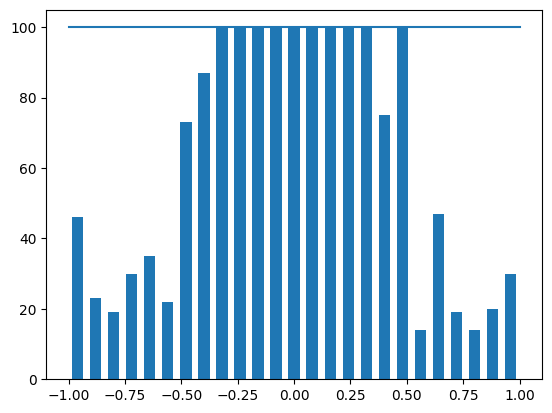

In [ ]:
# Se depura el dataset utilizando el valor de la variable samples_per_bin para truncar el máximo de elementos por clase.

print('total data:', len(data))
remove_list = []

for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i]<= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))

plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])),(samples_per_bin, samples_per_bin))

In [ ]:
# Se imprime los datos ejemplo de uno de los datapoints
print(data.iloc[1])

# Se define función para cargar las imágenes en formato de np array en variable image_paths y se carga variable dependiente "steering" en df steerings.
def load_img_steering(datadir, df):
  image_path = []
  steering = []

  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))

    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)

    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)

  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2023_06_19_22_04_59_443.jpg
left        left_2023_06_19_22_04_59_443.jpg  
right       right_2023_06_19_22_04_59_443.jpg 
steering   -0.05                              
throttle    1.0                               
reverse     0                                 
speed       14.64544                          
Name: 10, dtype: object


In [ ]:
# Se preparan los sub-conjuntos de entrenamiento y validación.
X_train, X_valid, y_train, y_valid = train_test_split(image_paths,steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples:{}'.format(len(X_train), len(X_valid)))

Training Samples: 3729
Valid Samples:933


Text(0.5, 1.0, 'Validation set')

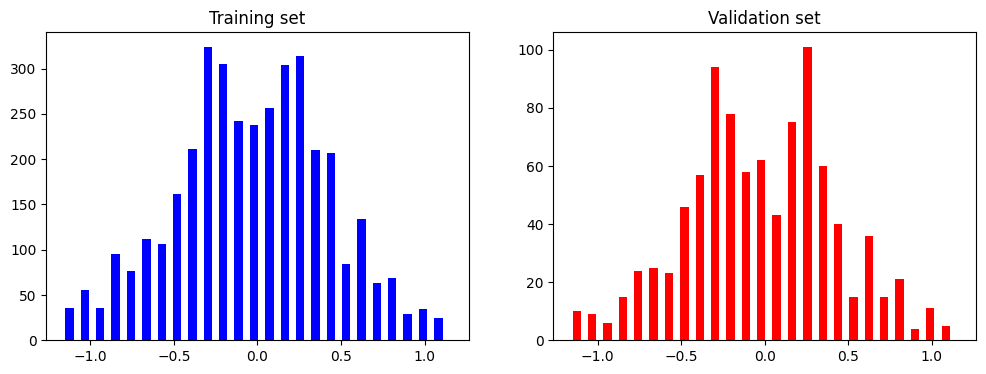

In [ ]:
# Se visualizan las distribuciones de los sub-conjuntos de entrenamiento y validación.
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

Se observa que se obtienen dos sub-conjuntos con clases balanceadas.

Se procede a revisar las imágenes importadas y realizar procesos de augmentación en caso de requerirse.

**Image Aumentation 1 - Zoom**

Text(0.5, 1.0, 'Zoomed Image')

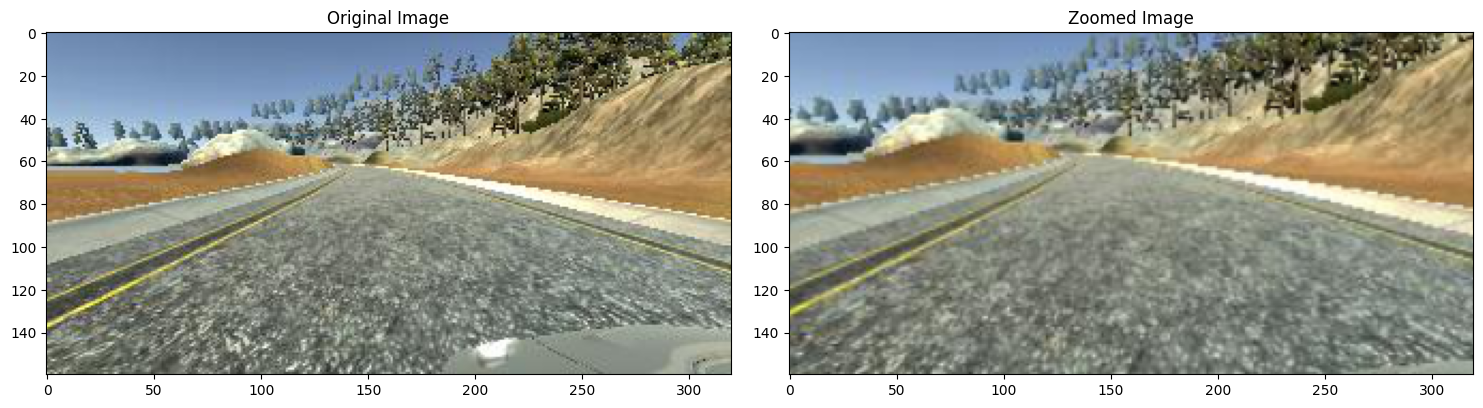

In [ ]:
# Se realiza procesamiento de zoom para enfocar región de interés

# Se define función para aplicar zoom
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

# Ejemplo de aplicación de función en una imagen aleatoria
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

# Visualización de imágen original vs imagen modificada
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

**Image Aumentation 2 - Panning**

Text(0.5, 1.0, 'Panned Image')

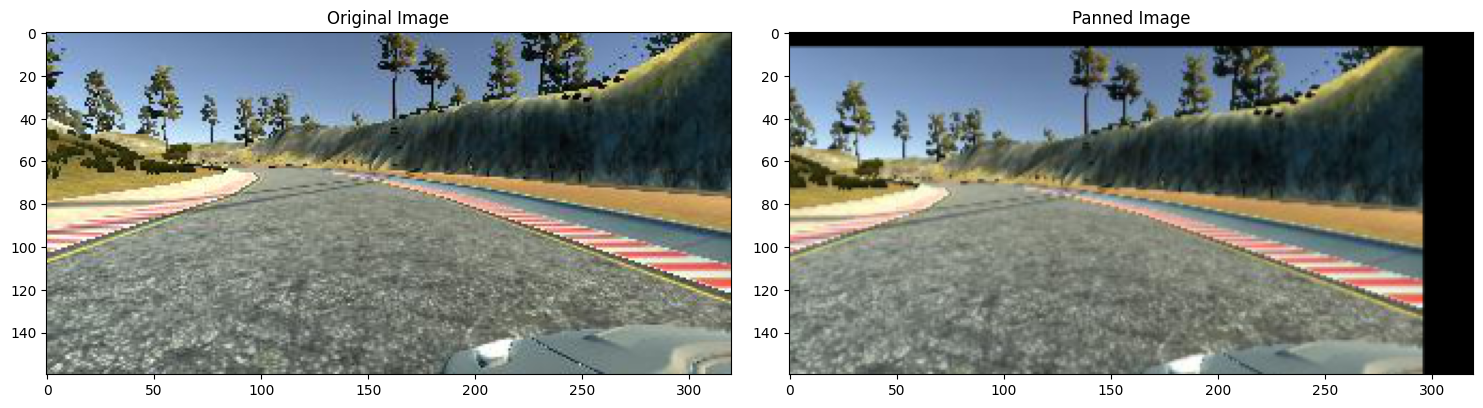

In [ ]:
# Se define función para aplicar paneo aleatorio
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y":(-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

# Ejemplo de aplicación de función en una imagen aleatoria
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

# Visualización de imágen original vs imagen modificada
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

**Image Aumentation 3 - Brightness**

Text(0.5, 1.0, 'Brightness altered image ')

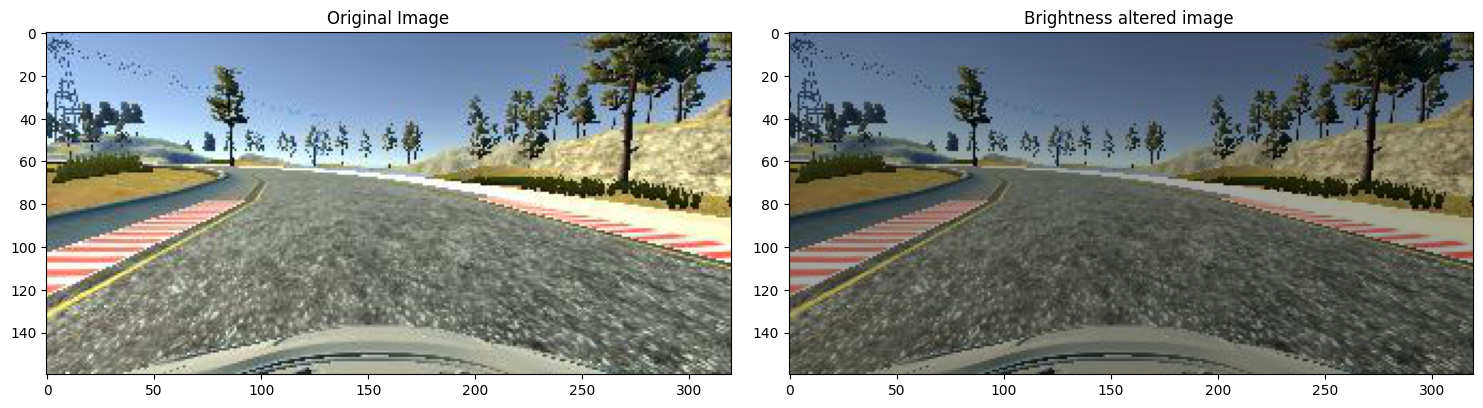

In [ ]:
# Se define función para aplicar modificación de brillo aleatorio
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

# Ejemplo de aplicación de función en una imagen aleatoria
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

# Visualización de imágen original vs imagen modificada
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

**Image Aumentation 4 - Horizontal and Vertical Flip**

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.7500001000000001')

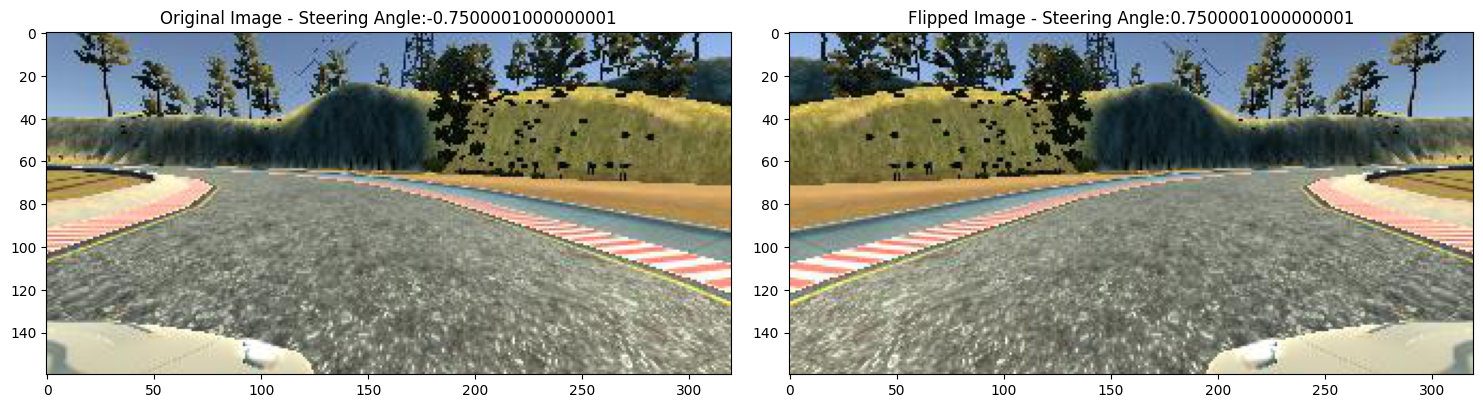

In [ ]:
# Se define función para aplicar modificación de orientación vertical y horizontal aleatorio
def img_random_flip(image, steering_angle):
  image = cv2.flip(image,1)
  steering_angle = -steering_angle
  return image, steering_angle

# Ejemplo de aplicación de función en una imagen aleatoria
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

# Visualización de imágen original vs imagen modificada
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

**Image Aumentation 5 - Steering Angle Based Flip**

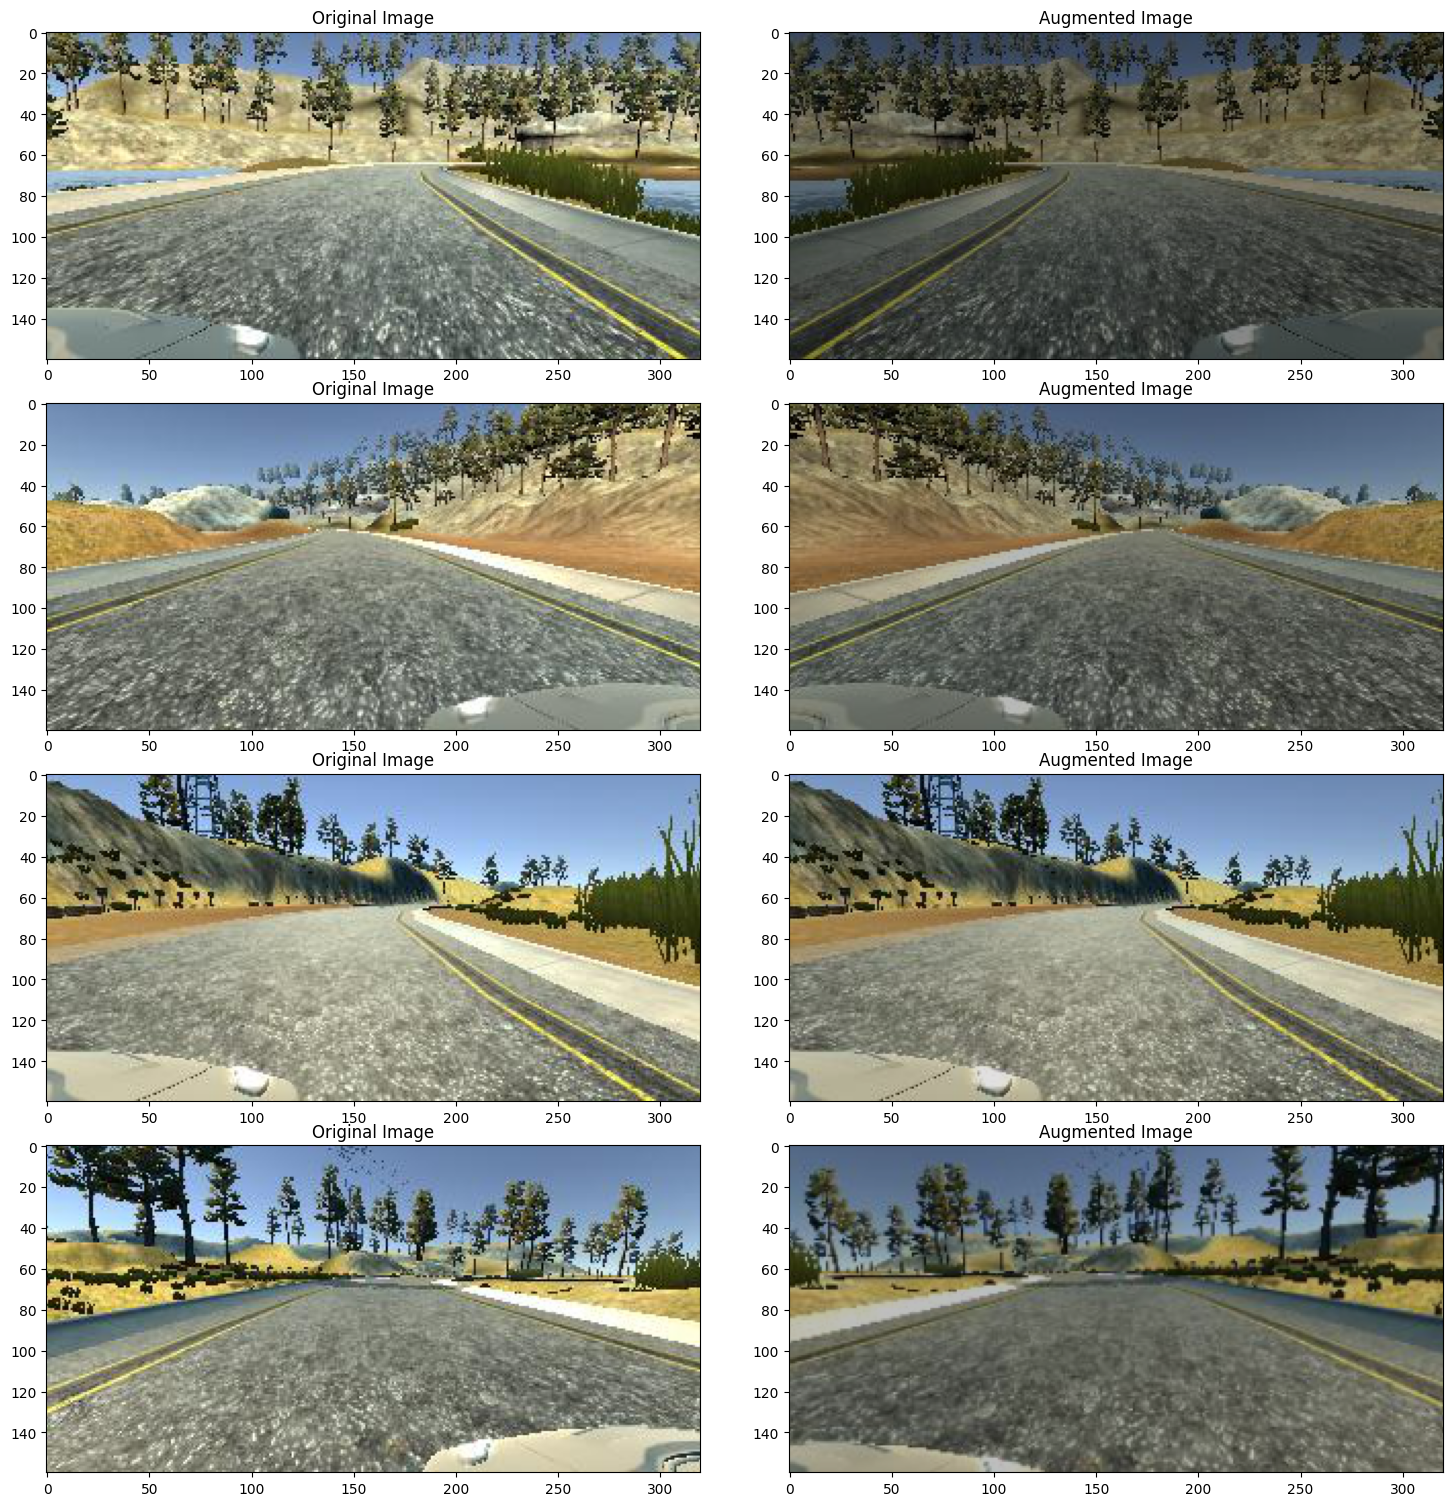

In [ ]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.1:
    image = pan(image)
  if np.random.rand() < 0.1:
    image = zoom(image)
  if np.random.rand() < 0.8:
    image = img_random_brightness(image)
  if np.random.rand() < 0.8:
    image, steering_angle = img_random_flip(image,steering_angle)
  return image, steering_angle

ncol = 2
nrow = 4

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 15))
fig.tight_layout()

for i in range(4):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image,random_steering)
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

**Image Aumentation 6 - Image Crop + Gaussian Blur**

Text(0.5, 1.0, 'Preprocessed Image')

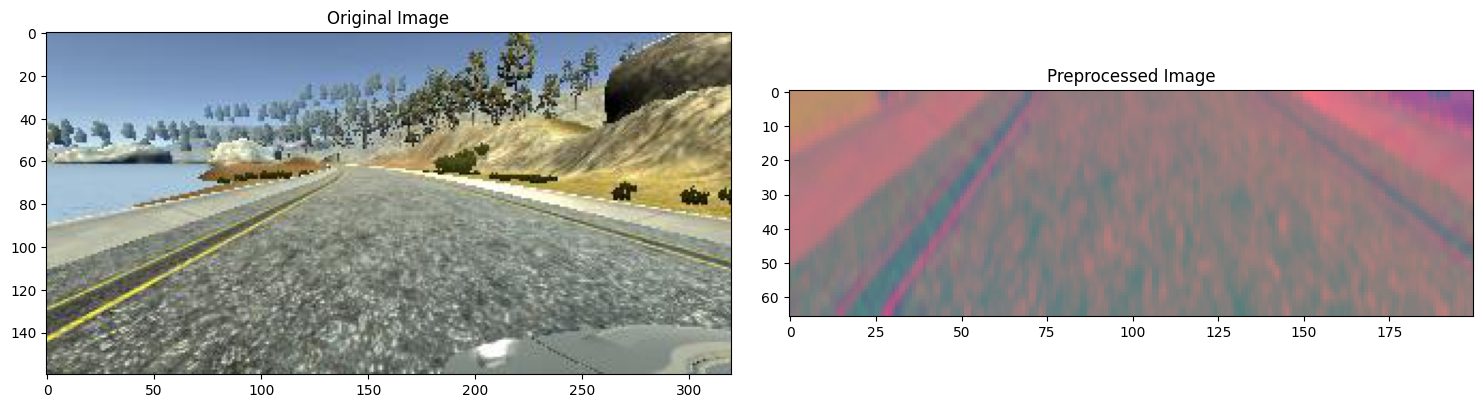

In [ ]:
def img_preprocess(img):
  img = img[80:120,:,:]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3, 3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

Una vez listos las funciones para la augmentación de las imágenes, se procede a realizar la carga del dataset final para entrenamiento y validación aplicando las augmentaciones.

Se define un método llamado "batch_generator" que utiliza una instancia del objeto "dataset" de la clase Sequence (keras.utils.Sequence) para evitar datos duplicados cuando utilizamos multiprocesamiento. Proporciona objetos de tipo tuple; ya sea (input, target) o (input, target, sample_weight).

Text(0.5, 1.0, 'Validation Image')

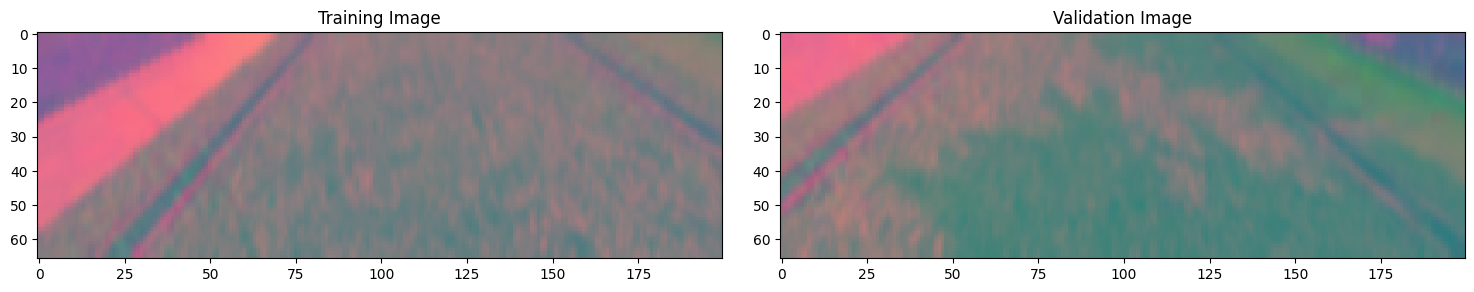

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      if istraining:
        im, steering = random_augment(image_paths[random_index],steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)

    yield (np.asarray(batch_img), np.asarray(batch_steering))

x_train_gen, y_train_gen = next(batch_generator(X_train, y_train,1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid,1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

### Preparación de Red Neuronal

In [ ]:
from keras.callbacks import ReduceLROnPlateau

def nvidia_model():
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(24,kernel_size=(5,5),strides=(2,2),input_shape=(66,200,3),activation="elu"))
  model.add(tf.keras.layers.Conv2D(36,kernel_size=(5,5),strides=(2,2),activation="elu"))
  model.add(tf.keras.layers.Conv2D(48,kernel_size=(5,5),strides=(2,2),activation="elu"))
  model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="elu"))

  model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="elu"))

  #model.add(Dropout(0.2))

  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(100,activation="elu"))
  #model.add(Dropout(0.2))
  model.add(tf.keras.layers.Dense(50,activation="elu"))
  #model.add(Dropout(0.2))
  model.add(tf.keras.layers.Dense(10,activation="elu"))
  #model.add(Dropout(0.2))
  model.add(tf.keras.layers.Dense(1))

  optimizer = Adam(lr=1e-3)
  model.compile(loss="mse",optimizer=optimizer)

  # Learning rate schedule
  lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, verbose=1)

  return model, lr_scheduler

model, lr_scheduler = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
    batch_generator(X_train, y_train, 100, 1),
    steps_per_epoch=250,
    epochs=10,
    validation_data=batch_generator(X_valid, y_valid, 100, 0),
    validation_steps=125,
    verbose=1,
    shuffle = 1,
    callbacks=[lr_scheduler]
    )

<ipython-input-22-44b7e5838efc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
250/250 [==============================] - 118s 441ms/step - loss: 0.2262 - val_loss: 0.1616 - lr: 0.0010
Epoch 2/10
250/250 [==============================] - 98s 394ms/step - loss: 0.1384 - val_loss: 0.1331 - lr: 0.0010
Epoch 3/10
250/250 [==============================] - 88s 353ms/step - loss: 0.1129 - val_loss: 0.1168 - lr: 0.0010
Epoch 4/10
250/250 [==============================] - 89s 357ms/step - loss: 0.1062 - val_loss: 0.1195 - lr: 0.0010
Epoch 5/10
250/250 [==============================] - 87s 351ms/step - loss: 0.0986 - val_loss: 0.1330 - lr: 0.0010
Epoch 6/10
250/250 [==============================] - 109s 437ms/step - loss: 0.0902 - val_loss: 0.0950 - lr: 0.0010
Epoch 7/10
250/250 [==============================] - 87s 351ms/step - loss: 0.0844 - val_loss: 0.1074 - lr: 0.0010
Epoch 8/10
250/250 [==============================] - 110s 441ms/step - loss: 0.0807 - val_loss: 0.0955 - lr: 0.0010
Epoch 9/10
250/250 [==============================] - ETA: 0s - loss:

Text(0.5, 0, 'Epoch')

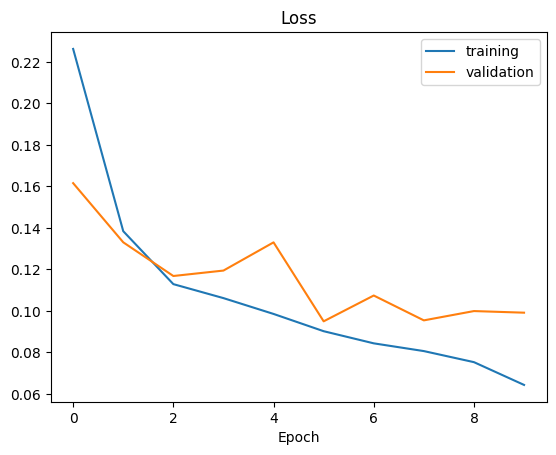

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["training","validation"])
plt.title("Loss")
plt.xlabel("Epoch")

In [ ]:
model.save("model_Final.h5")

## **Resultados anteriores**

### 1.   Modelo A: se entrena con parámetros originales de red neuronal nvidia_model.

  Resultados:
*   loss = 0.0658
*   val_loss = 0.0522

### 2.   Modelo B: se entrena incluyendo una capa adicional de Dropout con valor de 0.5 previo a las capas Dense.

  Resultados:
*   loss = 0.0703
*   val_loss = 0.0591


### 3.   Modelo C: se entrena aumentando epochs a 30 para explorar si el modelo con los parámetros existentes tiene espacio de mejora si se le permite más recurrencias.

     Resultados:
*   loss = 0.0484
*   val_loss = 0.0490



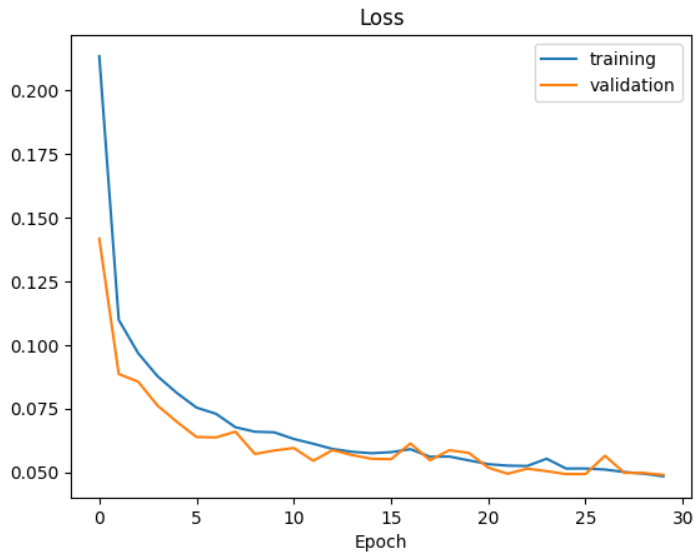

### 4. Modelo D: se entrena agregando capas de dropout con valor de 0.2 previo e intermedio de las capas Dense como técnica de regularización para prevenir overfitting. Adicionalmente se agrega la técnica de Learning Rate scheduling para usar un learning rate dinámico en lugar de estático durante el entrenamiento para ayudar al modelo a converger más rápido y llegar a un mejor mínimo utilizando "ReduceLROnPlateau" callback.

  Resultados:
*   loss = 0.0681
*   val_loss = 0.0615

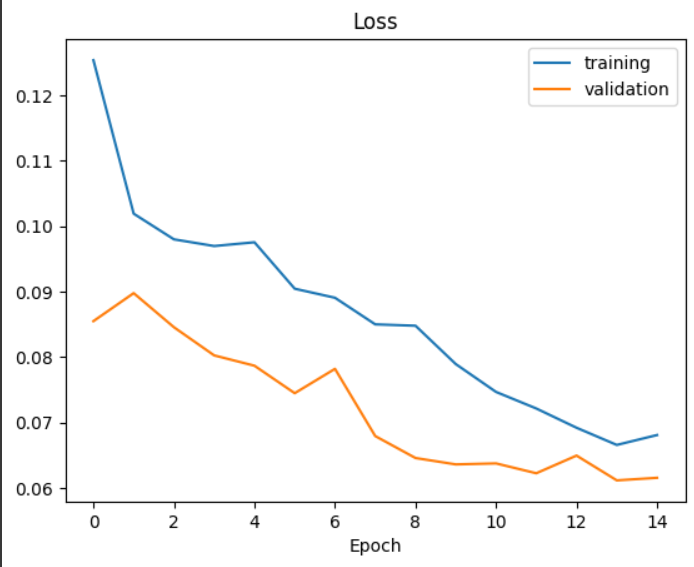

### 5. Modelo E: se entrena aumentando el tamaño del dataset modificando el truncamiento de imágenes para balanceo de clases de 400 a 1000 samples. Por ende aumentando el tamaño del dataset en alrededor de 1000 imágenes. Adicionalmente se configura de nuevo con 30 epocas y learning rate variable para apoyar con la convergencia.

  Resultados:
*   loss = 0.0455
*   val_loss = 0.0412

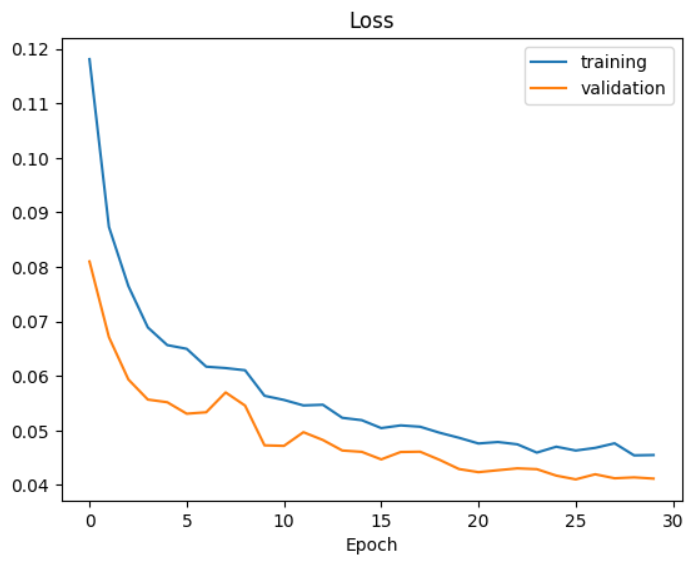

### 6. Modelo F: Se retoma parámetros implementados en Modelo D ya que presenta mejor capacidad de generalizar al realizar pruebas en simulador. Se modifica el rango de ajuste en brillo en la etapa de Data Augmentation brightness = iaa.Multiply((0.1, 1)).

Se entrena agregando capas de dropout con valor de 0.2 previo e intermedio de las capas Dense como técnica de regularización para prevenir overfitting. Adicionalmente se agrega la técnica de Learning Rate scheduling para usar un learning rate dinámico en lugar de estático durante el entrenamiento para ayudar al modelo a converger más rápido y llegar a un mejor mínimo utilizando "ReduceLROnPlateau" callback.

Resultados:
*   loss = 0.0672
*   val_loss = 0.0500


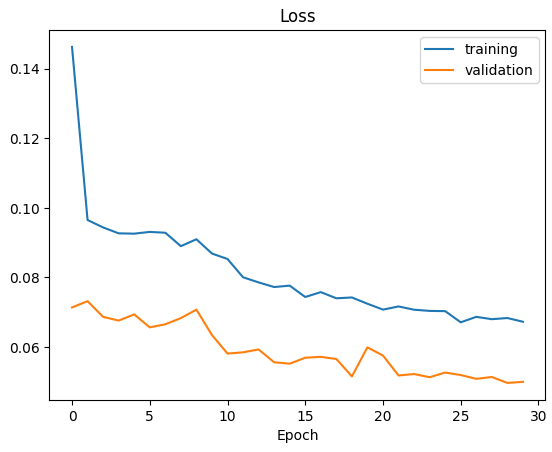

## **Conclusiones**

1.Se observó la efectividad en el uso de capas Dropout como técnica de regularización para evitar el sobreajuste (overfitting) y promover la generalización y robustez del modelo al forzar a la red a aprender características evitando la dependencia de un conjunto específico de neuronas resultando en mejores predicciones frente a datos no vistos durante el entrenamiento.

Este efecto se presentó al incluir en el entrenamiento del Modelo D capas de Dropout entre las capas dense del modelo y el cual permitió un mejor rendimiento en el simulador.

2.Se identificaron dos factores significativos entre el dataset de entrenamiento (track 1) y el escenario de prueba (track 2) como diferenciadores en el rendimiento del modelo:

a.	Sombras (Diferencias en brillo y contraste).

b.	Pendientes (Diferencias en ángulos de incidencia).


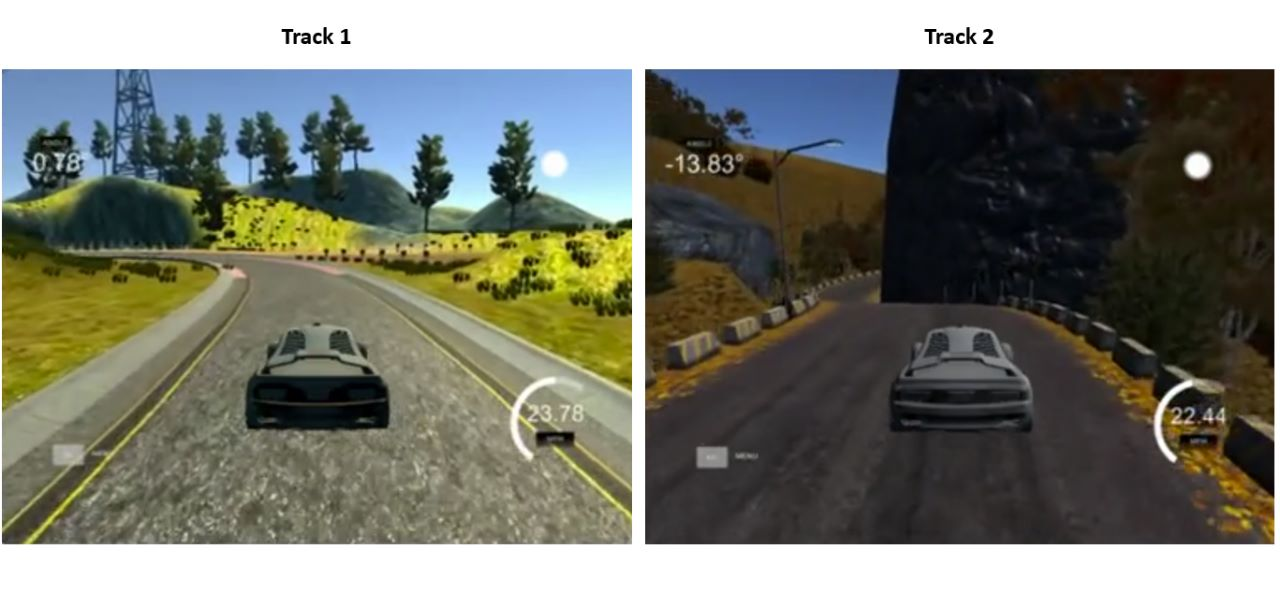

3.Después de probar varios modelos donde el track 1 siempre fue exitoso el track 2 provoco un reto por los diferenciadores mencionados anteriormente.
Por lo cual se modifico la parte de aumentación la probabilidad de los random para dar mayor preferencia a los procesos de modificar el brillo y volteo horizontal de la imagen.
Se encontró que al aumentar la velocidad en el scrip en Python llamado nav.py que conecta el modelo entrenado con el simulador de udacity a 30 mph provoco mejores resultados.


En otras palabras el proceso de clonación de comportamiento (**Behavioral Cloning**) es un proceso bastante robusto para que una red neuronal aprenda la ruta de la pista, pero un punto fundamental para este modelo entrenado se puedo usar en cualquier pista es el preprocesamiento de la imagen así como la parte de aumentación que al final del día fue la que provoco el éxito de que el carro completara la segunda pista.


## **Video Resumen**

Video de la explicación del proyecto. (incluye demo reducida)

https://youtu.be/5tgdWhpl_2c

**Adicional:**

La siguiente liga incluye la demo completa del proyecto:
* Track 1. (hasta 1:45 min)
* Track 2. (del 1.45 min en adelante)

https://youtu.be/1WiilRRZQS8


## **Referencias**



*   Capítulo 10. Ranjan, S. y Senthamilarasu S.(2020). Applied Deep Learning and Computer Vision for Self-Driving Cars. Packt Publishing Ltd. Links to an external site.https://learning.oreilly.com/library/view/applied-deep-learning/9781838646301/?sso_link=yes&sso_link_from=ITESLinks to an external site.M

* Bojarski, M. et. al. (2016). End to End Learning for Self Driving Cars. Disponible en: https://arxiv.org/abs/1604.07316Links to an external site.

* Owoyemi, J. (2017). Behavioural Cloning Applied to Self-Driving Car on a Simulated Track. Towards Data Science.https://towardsdatascience.com/behavioural-cloning-applied-to-self-driving-car-on-a-simulated-track-5365e1082230

* Staravoitau, A. (2019). End to End Learning for Self-Driving Cars. Github. https://github.com/alexstaravoitau/behavioral-cloning.git

* NArinder, P. (2020).Enhanced Behavioral Cloning Based self-driving Car Using Transfer Learning. arxiv. https://arxiv.org/abs/2007.05740

